# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


In [3]:
pprint(cities)

['adamstown',
 'coahuayana de hidalgo',
 'tinajo',
 'yellowknife',
 'port mathurin',
 'north bay',
 'lata',
 'yuzhno-kurilsk',
 'puerto ayora',
 'grytviken',
 'poronaysk',
 'obama',
 'itaituba',
 'tazovsky',
 'minas de marcona',
 'albany',
 'jinxiang',
 'ushuaia',
 'new norfolk',
 'selfoss',
 "nuku'alofa",
 'vernon',
 'enewetak',
 'itapuranga',
 'port elizabeth',
 'devinuwara',
 'taiohae',
 'qaqortoq',
 'moroni',
 'vilyuchinsk',
 'rodolfo sanchez taboada',
 'edinburgh of the seven seas',
 'cidreira',
 'hawaiian paradise park',
 'bredasdorp',
 'blackmans bay',
 "arkhangel'sk",
 'badger',
 'college',
 'christchurch',
 'kirksville',
 'bilibino',
 'dali',
 'hamilton',
 'iqaluit',
 'talnakh',
 'waitangi',
 'dudinka',
 'praia da vitoria',
 'port-aux-francais',
 'olmos',
 'ilulissat',
 'isafjordur',
 'nizhneangarsk',
 'richards bay',
 'alesund',
 'manacapuru',
 'kintinku',
 'hasaki',
 'bethel',
 'geraldton',
 'longyearbyen',
 'neryungri',
 'laurel',
 'balqash',
 'newport',
 'kismayo',
 'iskat

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Testing the validity of the data stored in the cities variable so that it can run in the request for-loop wihtout issue.
for i, city in enumerate(cities):
    print(f"This is {city}, its index is {i}")

This is adamstown, its index is 0
This is coahuayana de hidalgo, its index is 1
This is tinajo, its index is 2
This is yellowknife, its index is 3
This is port mathurin, its index is 4
This is north bay, its index is 5
This is lata, its index is 6
This is yuzhno-kurilsk, its index is 7
This is puerto ayora, its index is 8
This is grytviken, its index is 9
This is poronaysk, its index is 10
This is obama, its index is 11
This is itaituba, its index is 12
This is tazovsky, its index is 13
This is minas de marcona, its index is 14
This is albany, its index is 15
This is jinxiang, its index is 16
This is ushuaia, its index is 17
This is new norfolk, its index is 18
This is selfoss, its index is 19
This is nuku'alofa, its index is 20
This is vernon, its index is 21
This is enewetak, its index is 22
This is itapuranga, its index is 23
This is port elizabeth, its index is 24
This is devinuwara, its index is 25
This is taiohae, its index is 26
This is qaqortoq, its index is 27
This is moroni, 

In [5]:
# Set the API base URL

# My version that didn't work
# url = "https://api.openweathermap.org/data/2.5/weather?"

# Tutor's version that did work
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # My version that didn't work
    # city_url = requests.get(f"{url}&q={city}&appid={weather_api_key}")

    # Tutor's version that did work
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
            # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | coahuayana de hidalgo
Processing Record 3 of Set 1 | tinajo
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | port mathurin
Processing Record 6 of Set 1 | north bay
Processing Record 7 of Set 1 | lata
Processing Record 8 of Set 1 | yuzhno-kurilsk
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | poronaysk
Processing Record 12 of Set 1 | obama
Processing Record 13 of Set 1 | itaituba
Processing Record 14 of Set 1 | tazovsky
Processing Record 15 of Set 1 | minas de marcona
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | jinxiang
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | selfoss
Processing Record 21 of Set 1 | nuku'alofa
Processing Record 22 of Set 1 | vernon
Processing Rec

In [6]:
# Testing the data within the city_data list
pprint(city_data[0])

{'City': 'adamstown',
 'Cloudiness': 100,
 'Country': 'PN',
 'Date': 1690329577,
 'Humidity': 85,
 'Lat': -25.066,
 'Lng': -130.1015,
 'Max Temp': 23.03,
 'Wind Speed': 17.51}


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,23.03,85,100,17.51,PN,1690329577
1,coahuayana de hidalgo,18.7000,-103.6583,30.56,68,99,1.65,MX,1690329578
2,tinajo,29.0788,-13.7081,22.49,73,75,7.20,ES,1690329578
3,yellowknife,62.4560,-114.3525,25.31,23,75,8.23,CA,1690329578
4,port mathurin,-19.6833,63.4167,23.23,78,25,6.83,MU,1690329578


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,23.03,85,100,17.51,PN,1690329577
1,coahuayana de hidalgo,18.7000,-103.6583,30.56,68,99,1.65,MX,1690329578
2,tinajo,29.0788,-13.7081,22.49,73,75,7.20,ES,1690329578
3,yellowknife,62.4560,-114.3525,25.31,23,75,8.23,CA,1690329578
4,port mathurin,-19.6833,63.4167,23.23,78,25,6.83,MU,1690329578


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

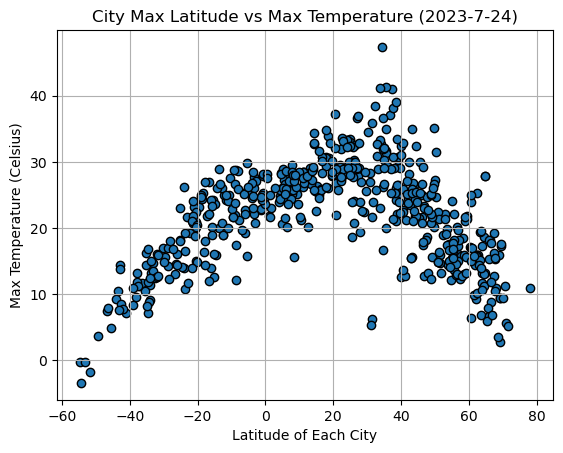

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df['Lat'],y=city_data_df['Max Temp'], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude of Each City")
plt.ylabel("Max Temperature (Celsius)")
plt.title("City Max Latitude vs Max Temperature (2023-7-24)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

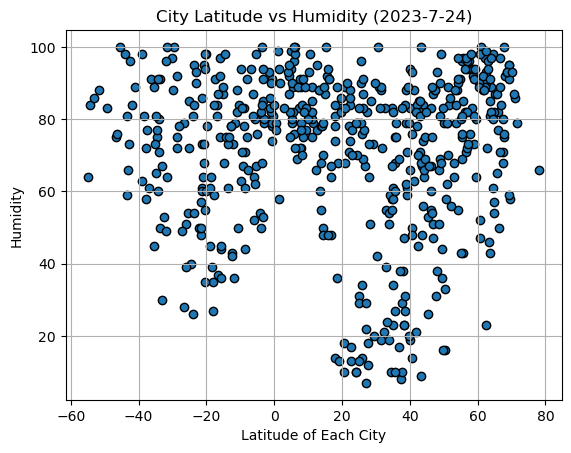

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df['Lat'],y=city_data_df['Humidity'], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude of Each City")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity (2023-7-24)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

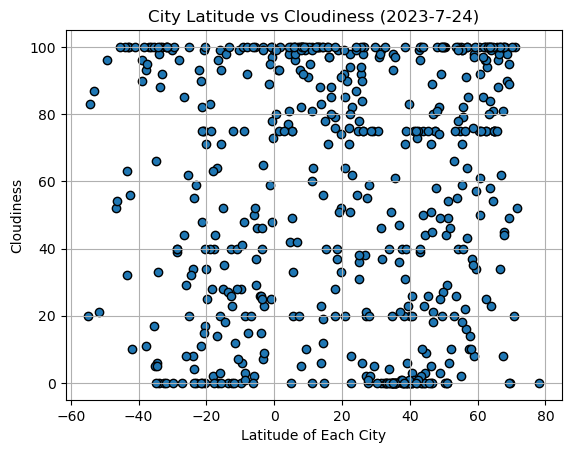

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df['Lat'],y=city_data_df['Cloudiness'], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude of Each City")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness (2023-7-24)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

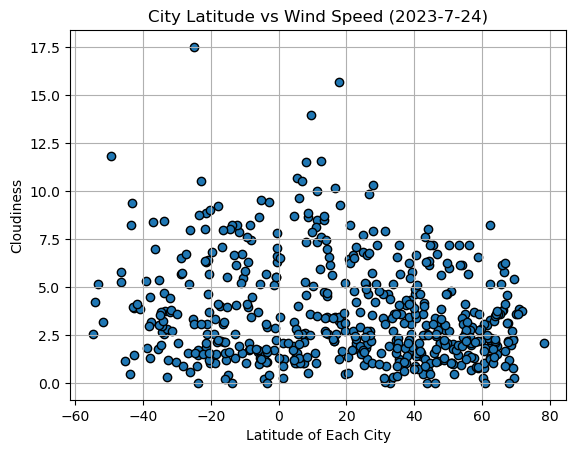

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df['Lat'],y=city_data_df['Wind Speed'], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude of Each City")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Wind Speed (2023-7-24)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Define a function to create Linear Regression plots
def l_regress_plotting(x_values,y_values):


    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # THIS CODE IS FROM DAVID PINSKEY BELOW
    if x_values.mean() < 0:
            plotx = -30
    else:
            plotx = 10
    # THIS CODE IS FROM DAVID PINSKEY ABOVE

    print(f"The r-value is {rvalue}")
    plt.title(f"Linear Regression of {x_values.name} and {y_values.name}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(plotx,15),fontsize=20,color="red")
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    plt.show()

# NOT REQUIRED
# Defines a function to create a map of the world using scatter plot data
def scatter_map(x_values,y_values):

    plt.title(f"globe map of {x_values.name} and {y_values.name}")
    plt.scatter(x_values,y_values)
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    plt.show()
    

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,coahuayana de hidalgo,18.7000,-103.6583,30.56,68,99,1.65,MX,1690329578
2,tinajo,29.0788,-13.7081,22.49,73,75,7.20,ES,1690329578
3,yellowknife,62.4560,-114.3525,25.31,23,75,8.23,CA,1690329578
5,north bay,46.3168,-79.4663,25.06,67,0,3.09,CA,1690329578
6,lata,40.1629,-8.3327,12.61,94,0,0.88,PT,1690329578


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,23.03,85,100,17.51,PN,1690329577
4,port mathurin,-19.6833,63.4167,23.23,78,25,6.83,MU,1690329578
8,puerto ayora,-0.7393,-90.3518,25.31,91,48,2.24,EC,1690329578
9,grytviken,-54.2811,-36.5092,-3.39,84,83,4.24,GS,1690329579
12,itaituba,-4.2761,-55.9836,25.75,54,26,0.19,BR,1690329579


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.6137135449451271


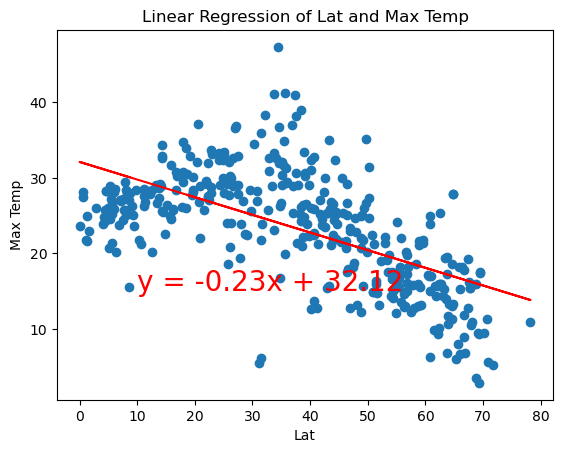

In [66]:
# Linear regression on Northern Hemisphere
l_regress_plotting(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

The r-value is 0.8520444061629897


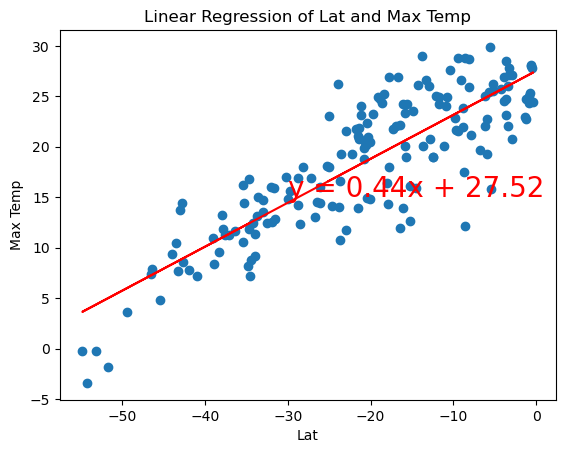

In [67]:
# Linear regression on Southern Hemisphere
l_regress_plotting(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** 

# Discussion:
##### This data takes random cities all around the globe and portrays their temperates as a scatter plot, showing that the closer to 0 that your latitude is (being closer to the equator) your max temperature will increase significantly. In the Northern Hemisphere the max temperature decrease isn't as stark until you reach the upper portions of the latitudinal data. In the Southern hemisphere the data indicates that as you move south, away from the equator, the max temperature will decrease at a steady rate per decrease of latitude.

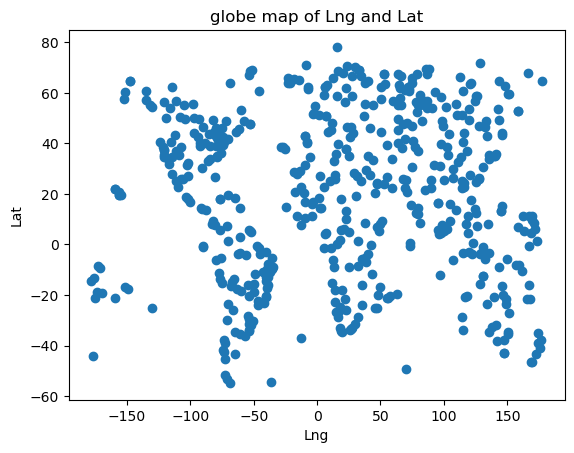

In [68]:
# THIS MAP IS FOR FUN, NOT PART OF THE ASSIGNMEMNT
# This map is a representation of the world and the coordinates of the cities we are analyzing in this assignment! 
scatter_map(city_data_df['Lng'],city_data_df['Lat'])

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.04136577348179664


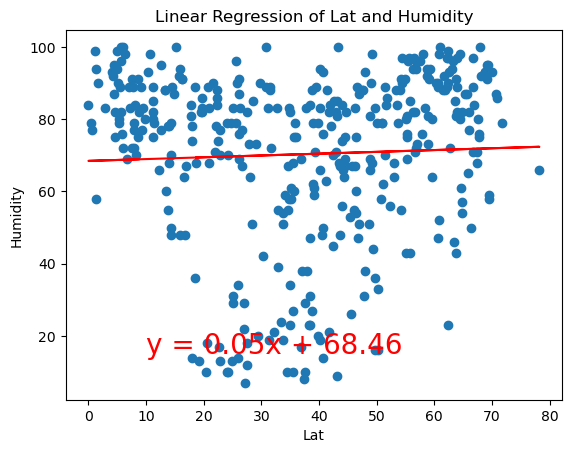

In [69]:
# Northern Hemisphere
l_regress_plotting(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

The r-value is -0.012053279521666318


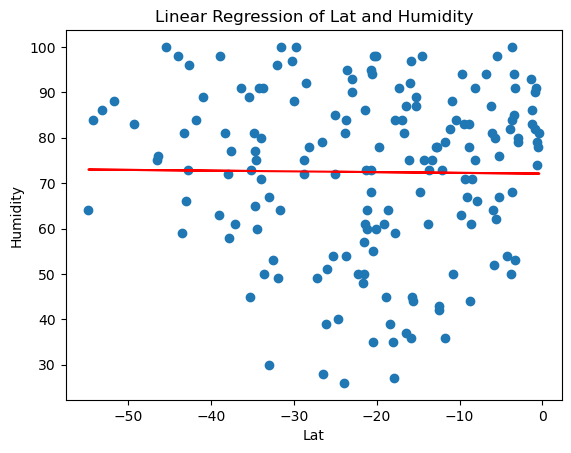

In [70]:
# Southern Hemisphere
l_regress_plotting(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** 

# Discussion:
##### This data takes random cities all around the globe and portrays their hudity values as a scatter plot. Unlike temperature, humidty varies greatly and has a low positive increase in the Northern Hemisphere and a low negative decrease in the Southern Hemisphere. 

##### According to the plot, in the Northern Hemisphere all latitudes experience great amounts of humidity (it is summer, at the time of recording) regardless of their latitudinal position. It is only toward the center of this data do a number of cities experience less humidity and the values are spread out more evenly.

##### According to the plot, in the Southern Hemisphere (where there is far less data in general due to landmass being less) humidity is generally high regardless of distance from the equator but with much more variation in the number of cities that experience lower humidity values than the Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.04136577348179664


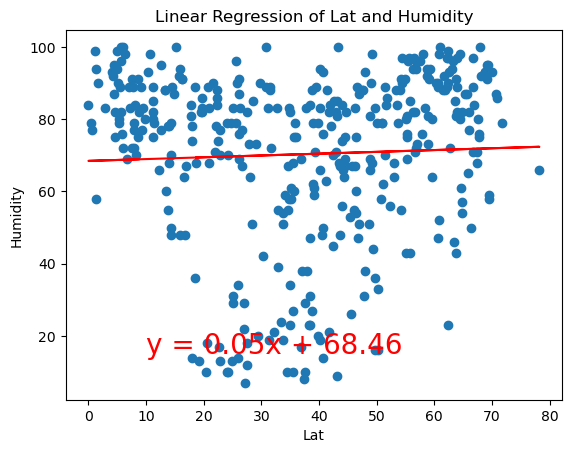

In [59]:
# Northern Hemisphere
l_regress_plotting(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

The r-value is -0.16181643117905237


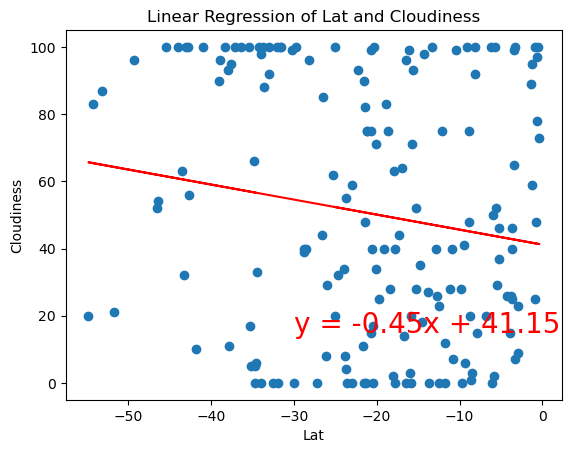

In [60]:
# Southern Hemisphere
l_regress_plotting(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** **Discussion about the linear relationship:** 

# Discussion:
##### This data takes random cities all around the globe and portrays their Cloudiness values as a scatter plot. Cloudiness, I assume, is a much more subjective value to record and thus needs to be handled and binned in such a way that the data can be recorded and processed such as all other data, but cannot be considered pure due to this same subjectivity. We can see evidence of this in the way the data is recorded above in both graphs. The data clusters around the values of the x-tick boxes of the scatterplot. This is much easier to see in the Northern Hemisphere than in the Southern due to the greater data we have for the Northern.

##### According to the plot, in the Northern Hemisphere Cloudiness is at it's greates for most points of data the closer you move to the equator and the close you get to the north pole, leaving the center of the hemisphere with a much lower general cloudiness. These are generalizations, of course, since the data suggests that all parts of the hemisphere experience all levels of cloudiness in varying degress. (except, of course, the north pole itself.)

##### According to the plot, in the Southern Hemisphere (where there is far less data in general due to landmass being less) Cloudiness tneds to be more polarized, either having values closer to the max and min of the data set.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.2351868618996379


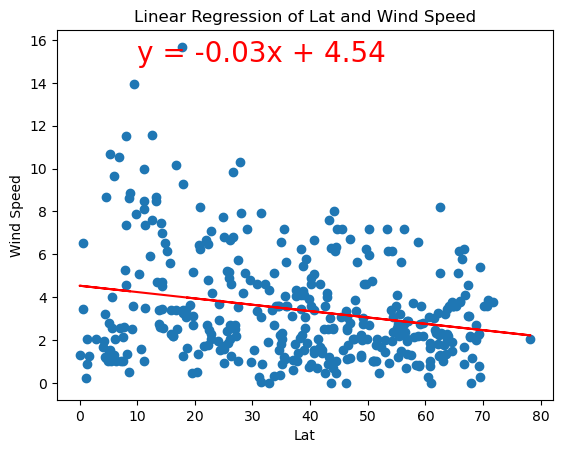

In [61]:
# Northern Hemisphere
l_regress_plotting(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

The r-value is -0.03566592252383854


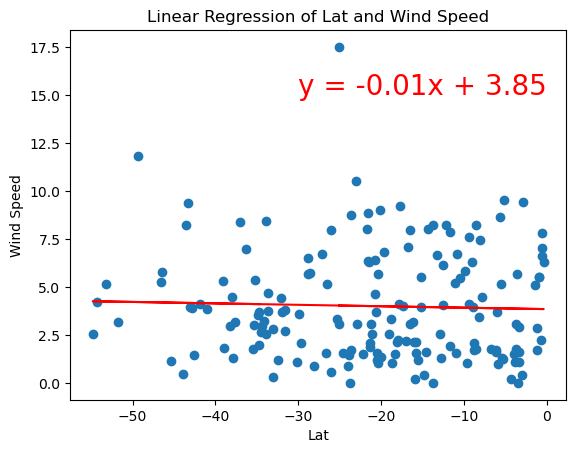

In [62]:
# Southern Hemisphere
l_regress_plotting(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:**

# Discussion:
##### This data takes random cities all around the globe and portrays their Wind Speed values as a scatter plot. The wind-speed for both northern and souther hemisphere seems to be such that not matter the latitude of your city, it will experience varying low-levels of wind-speed, rarely reaching above 9 mph in both hemispheres.  